In [32]:
import requests
from requests.packages.urllib3.util.ssl_ import create_urllib3_context
from bs4 import BeautifulSoup
import pandas as pd

class CustomHttpAdapter(requests.adapters.HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        context = create_urllib3_context()
        context.set_ciphers("DEFAULT@SECLEVEL=1")
        kwargs['ssl_context'] = context
        return super(CustomHttpAdapter, self).init_poolmanager(*args, **kwargs)

# URL of the Macbeth full text
url = "https://shakespeare.mit.edu/macbeth/full.html"

# Create a session
session = requests.Session()
session.mount("https://", CustomHttpAdapter())

# Send a GET request to fetch the HTML content
response = session.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

# Extract the text from the HTML
text = soup.get_text(separator='\n', strip=True)

# Print the extracted text
print(text[:1000])


Macbeth: Entire Play
The Tragedy of Macbeth
Shakespeare homepage
|
Macbeth
| Entire play
ACT I
SCENE I. A desert place.
Thunder and lightning. Enter three Witches
First Witch
When shall we three meet again
In thunder, lightning, or in rain?
Second Witch
When the hurlyburly's done,
When the battle's lost and won.
Third Witch
That will be ere the set of sun.
First Witch
Where the place?
Second Witch
Upon the heath.
Third Witch
There to meet with Macbeth.
First Witch
I come, Graymalkin!
Second Witch
Paddock calls.
Third Witch
Anon.
ALL
Fair is foul, and foul is fair:
Hover through the fog and filthy air.
Exeunt
SCENE II. A camp near Forres.
Alarum within. Enter DUNCAN, MALCOLM, DONALBAIN, LENNOX, with Attendants, meeting a bleeding Sergeant
DUNCAN
What bloody man is that? He can report,
As seemeth by his plight, of the revolt
The newest state.
MALCOLM
This is the sergeant
Who like a good and hardy soldier fought
'Gainst my captivity. Hail, brave friend!
Say to the king the knowledge of th

In [33]:
import nltk

In [34]:
text = text.lower()
print(text[:20])

macbeth: entire play


In [35]:
# Download Punkt tokenizer models and tokenize the text into words.
nltk.download('punkt')
text = nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/willberritt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
print(text[:20])

['macbeth', ':', 'entire', 'play', 'the', 'tragedy', 'of', 'macbeth', 'shakespeare', 'homepage', '|', 'macbeth', '|', 'entire', 'play', 'act', 'i', 'scene', 'i.', 'a']


In [37]:
# Filter out non-alphabetic tokens from the tokenized text.
text = [word for word in text if word.isalpha()]

In [38]:
type(text)

list

In [39]:
from collections import Counter

# Count frequencies of each word
word_counts = Counter(text)

# Create DataFrame from word_counts
df = pd.DataFrame(list(word_counts.items()), columns=['Unique Words', 'Count'])

# Sort DataFrame by counts
df = df.sort_values(by='Count', ascending=False).reset_index(drop=True)

print(df)

     Unique Words  Count
0             the    732
1             and    565
2              to    382
3               i    367
4              of    343
...           ...    ...
3099         shot      1
3100        shaft      1
3101    murderous      1
3102       nearer      1
3103      needful      1

[3104 rows x 2 columns]


In [40]:
# Remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_text = [word for word in text if word.lower() not in stop_words]

In [41]:
print(filtered_text[:20])

['macbeth', 'entire', 'play', 'tragedy', 'macbeth', 'shakespeare', 'homepage', 'macbeth', 'entire', 'play', 'act', 'scene', 'desert', 'place', 'thunder', 'lightning', 'enter', 'three', 'witches', 'first']


In [42]:
# Count frequencies of each word
word_counts = Counter(filtered_text)

# Create DataFrame from word_counts
filtered_df = pd.DataFrame(list(word_counts.items()), columns=['Unique Words', 'Count'])

# Sort DataFrame by counts (optional)
filtered_df = filtered_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

print(filtered_df)

     Unique Words  Count
0         macbeth    288
1         macduff    107
2            lady     95
3            thou     90
4          banquo     76
...           ...    ...
2978          fix      1
2979         hawk      1
2980      mousing      1
2981        pride      1
2982      needful      1

[2983 rows x 2 columns]


In [43]:
characters = [
    'macbeth', 'lady macbeth', 'three witches', 'banquo', 'king duncan', 
    'malcolm', 'donalbain', 'macduff', 'lady macduff', 'fleance', 
    'ross', 'lennox', 'seyton', 'hecate', 'siward', 'young siward', 
    'first murderer', 'second murderer', 'porter', 'lady'
]

# Create DataFrame
df_characters = pd.DataFrame(characters, columns=['Characters'])
print(df_characters)

         Characters
0           macbeth
1      lady macbeth
2     three witches
3            banquo
4       king duncan
5           malcolm
6         donalbain
7           macduff
8      lady macduff
9           fleance
10             ross
11           lennox
12           seyton
13           hecate
14           siward
15     young siward
16   first murderer
17  second murderer
18           porter
19             lady


In [44]:
# Remove rows where 'Unique Words' (lowercase) are in df_characters['Characters'], set display to show all rows, and print the first 200 rows.
filtered_df = filtered_df[~filtered_df['Unique Words'].str.lower().isin(df_characters['Characters'])]
print(filtered_df.head(200))

    Unique Words  Count
3           thou     90
5          shall     67
6          enter     65
7           thee     61
8           upon     60
..           ...    ...
207         drum      8
208        truth      8
209       sorrow      8
210     children      8
211        forth      8

[200 rows x 2 columns]


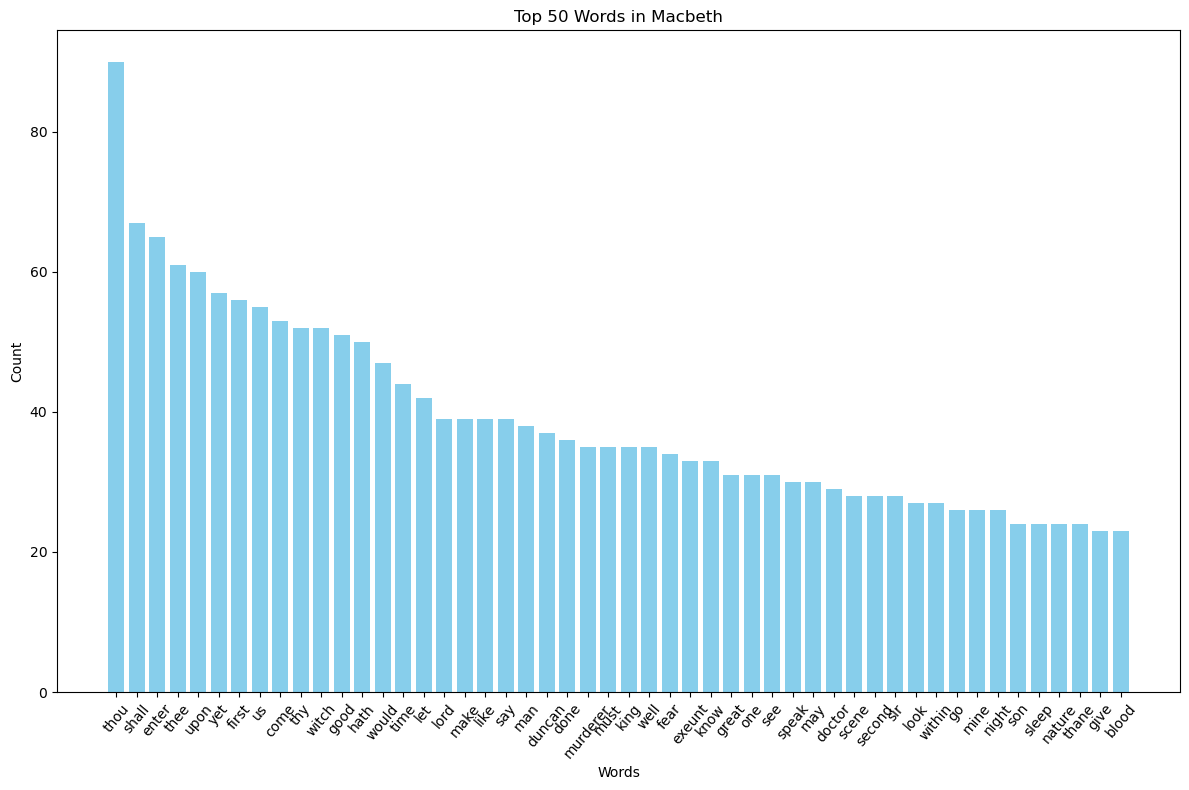

In [45]:
import matplotlib.pyplot as plt
# Sort dataframe by Count in descending order and take top 50
filtered_df_top50 = filtered_df.sort_values(by='Count', ascending=False).head(50)

# Plotting the bar chart for top 50 words
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
plt.bar(filtered_df_top50['Unique Words'], filtered_df_top50['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 50 Words in Macbeth')
plt.xticks(rotation=50)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()

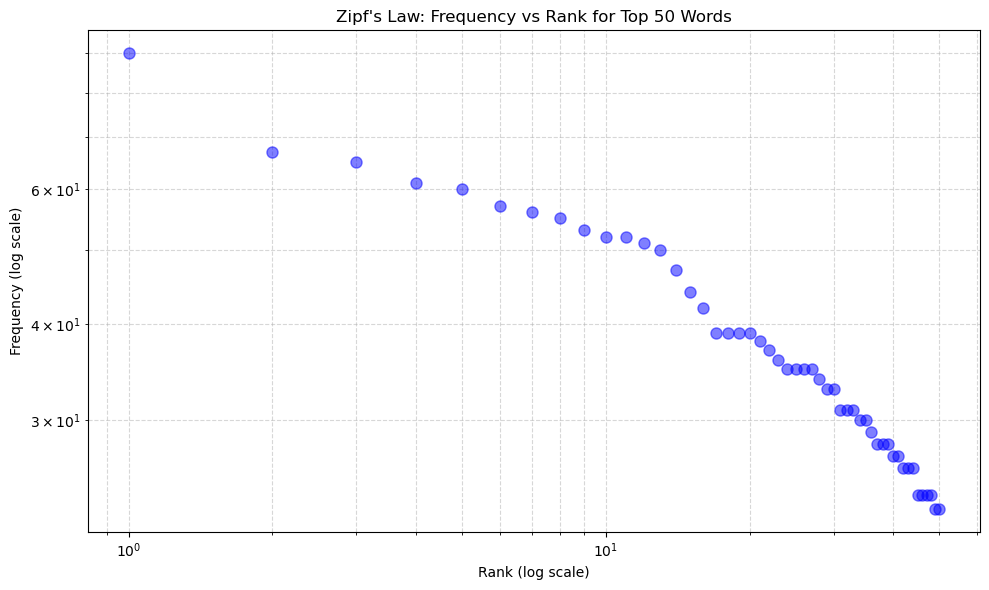

In [46]:
import numpy as np
# Sort dataframe by Count in descending order and take top 50
filtered_df = filtered_df.sort_values(by='Count', ascending=False).head(50)

# Calculate rank
filtered_df['Rank'] = np.arange(1, len(filtered_df) + 1)

# Plotting frequency vs rank (log-log scale)
plt.figure(figsize=(10, 6))
plt.loglog(filtered_df['Rank'], filtered_df['Count'], marker='o', linestyle='None', markersize=8, color='b', alpha=0.5)
plt.title('Zipf\'s Law: Frequency vs Rank for Top 50 Words')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

We can see that Zipf's Law holds as the graph above shows a roughly -1 slope between frequency and rank. This tells us that the frequency of the words in this data set are inversely proportionate to their rank which implies that few of the words are very common and many of the words are relatively rare.

I think the idea behind Zipf's Law is that it is a constant among all corpora. Every article of writing will have a select few words that are very common and many that are rare. So the relationship will be similar. Obviously, there are specific things about this corpus like the voacabulary, high frequency words, proportion of common words etc.